In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


#!pip install deepchem rdkit matplotlib networkx

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from deepchem.feat import MolGraphConvFeaturizer
from deepchem.feat import CircularFingerprint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from deepchem.feat import ConvMolFeaturizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
import deepchem as dc
#from drive.MyDrive.code.methods import *
from methods_fingerprints import *

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 16.1 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [ ]:
smiles_tr,smiles_test, logSweeter_tr, logSweeter_test, families_tr, families_test = load_data("../data/SweetnersDB.xlsx")

Index(['Name', 'logSw', 'Chemical family', 'Dataset', 'Smiles'], dtype='object')


In [ ]:
X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)

[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerator
[14:06:53] DEPRECATION WARNING: please use MorganGenerat

In [ ]:
# Créer et entraîner le modèle SVR
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_tr, y_tr)

SVR(C=100)

In [ ]:
# Évaluer le modèle
score = svr.score(X_test, y_test)
print(f"Score R² du modèle: {score:.2f}")

Score R² du modèle: 0.55


In [ ]:
# Faire des prédictions
y_pred_train = svr.predict(X_tr)
y_pred_test = svr.predict(X_test)


In [ ]:
# Inverser la normalisation pour obtenir les valeurs réelles
y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
y_train = scaler_y.inverse_transform(y_tr.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

In [ ]:
X = np.vstack((X_tr,X_test))
y = np.hstack((y_train,y_test))

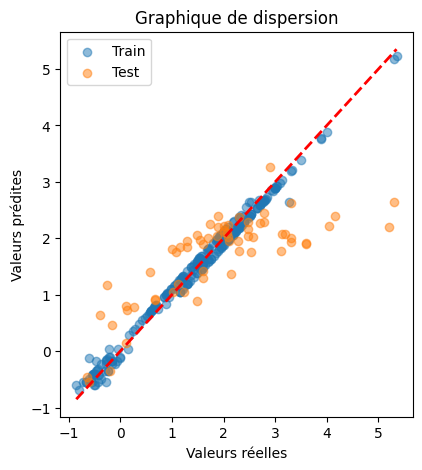

In [ ]:
# Visualisation : Graphique de dispersion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion')
plt.legend()

In [ ]:


# Afficher les métriques de performance
from sklearn.metrics import r2_score, mean_squared_error
print(f"R² (Train): {r2_score(y_train, y_pred_train):.4f}")
print(f"R² (Test): {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE (Train): {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_test):.4f}")

R² (Train): 0.9888
R² (Test): 0.5454
MSE (Train): 0.0148
MSE (Test): 0.7658


# Scoring regression logistique


In [ ]:
sweet_thr = 0
ytr = pd.DataFrame(y_tr,columns=['label'])
target_tr =  ytr['label'].apply(lambda x: 0 if x <= sweet_thr else 1)

In [ ]:
ytest = pd.DataFrame(y_test,columns=['label'])
target_test =  ytest['label'].apply(lambda x: 0 if x <= sweet_thr else 1)

In [ ]:
# Normalisation des données
'''scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Création et entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_tr, target_tr)

LogisticRegression()

In [ ]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.71875
Confusion Matrix:
[[ 6  0]
 [18 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         6
           1       1.00      0.69      0.82        58

    accuracy                           0.72        64
   macro avg       0.62      0.84      0.61        64
weighted avg       0.93      0.72      0.78        64



# scoring arbre de décision


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Création et entraînement du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)
model.fit(X_tr, target_tr)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.796875
Confusion Matrix:
[[ 6  0]
 [13 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      1.00      0.48         6
           1       1.00      0.78      0.87        58

    accuracy                           0.80        64
   macro avg       0.66      0.89      0.68        64
weighted avg       0.94      0.80      0.84        64



In [ ]:
!pip install graphviz

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Visualisation de l'arbre de décision
# Limitez la visualisation à un sous-ensemble de caractéristiques si nécessaire
Xtr = pd.DataFrame(X_tr)
feature_names = Xtr.columns
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=feature_names,
    class_names=['class0', 'class1'],  # Remplacez par vos classes réelles
    filled=True,
    rounded=True,
    special_characters=True
)

# Affichage de l'arbre
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Sauvegarde l'arbre dans un fichier nommé "decision_tree"
graph.view()  # Affiche l'arbre

'decision_tree.pdf'

# Scoring random forest

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 # Création et entraînement du modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_tr, target_tr)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(target_test, y_pred)
conf_matrix = confusion_matrix(target_test, y_pred)
class_report = classification_report(target_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8125
Confusion Matrix:
[[ 6  0]
 [12 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         6
           1       1.00      0.79      0.88        58

    accuracy                           0.81        64
   macro avg       0.67      0.90      0.69        64
weighted avg       0.94      0.81      0.85        64

